### What heppend when you call NLP ?

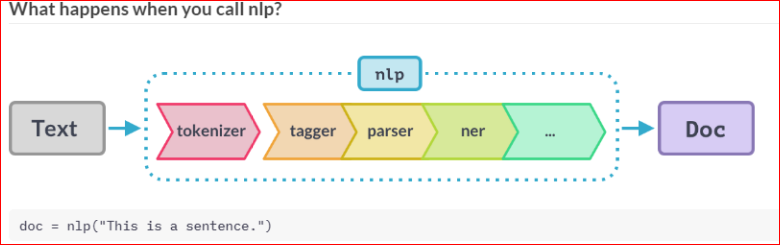

You've already written this plenty of times by now: pass a string of text to the nlp object, and receive a Doc object.

But what does the nlp object actually do?

First, the tokenizer is applied to turn the string of text into a Doc object. Next, a series of pipeline components is applied to the Doc in order. In this case, the tagger, then the parser, then the entity recognizer. Finally, the processed Doc is returned, so you can work with it.

#### Built-in pipeline components

spaCy ships with the following built-in pipeline components.

The part-of-speech tagger sets the token dot tag attribute.

The dependency parser adds the token dot dep and token dot head attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.

The named entity recognizer adds the detected entities to the doc dot ents property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.

Finally, the text classifier sets category labels that apply to the whole text, and adds them to the doc dot cats property.

Because text categories are always very specific, the text classifier is not included in any of the pre-trained models by default. But you can use it to train your own system.

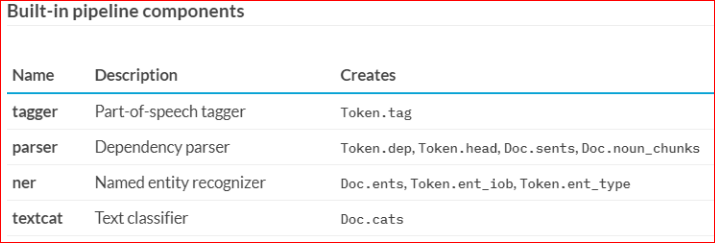

#### Under the hood

All models you can load into spaCy include several files and a meta JSON.

The meta defines things like the language and pipeline. This tells spaCy which components to instantiate.

The built-in components that make predictions also need binary data. The data is included in the model package and loaded into the component when you load the model.

1. Pipeline defined in model's meta.json in order
2. Built-in components need binary data to make predictions

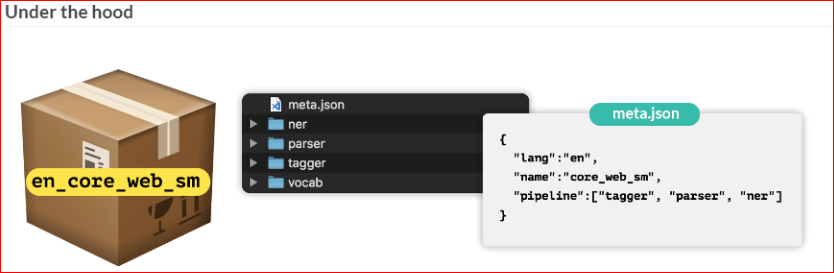

#### Pipeline Attributes

To see the names of the pipeline components present in the current nlp object, you can use the nlp dot pipe names attribute.

For a list of component name and component function tuples, you can use the nlp dot pipeline attribute.

The component functions are the functions applied to the Doc to process it and set attributes – for example, part-of-speech tags or named entities.

In [3]:
# nlp.pipe_names: list of pipeline component names

import spacy
nlp = spacy.load('en_core_web_lg')

print(nlp.pipe_names)

['tagger', 'parser', 'ner']


In [4]:
# nlp.pipeline: list of (name, component) tuples

print(nlp.pipeline)

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x000001EE51196C48>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x000001EE5118D9A8>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x000001EE5118DF48>)]


### Custom Pipeline Components

Custom pipeline components let you add your own function to the spaCy pipeline that is executed when you call the nlp object on a text – for example, to modify the Doc and add more data to it

#### Why customer components?

fter the text is tokenized and a Doc object has been created, pipeline components are applied in order. spaCy supports a range of built-in components, but also lets you define your own.

Custom components are executed automatically when you call the nlp object on a text.

They're especially useful for adding your own custom metadata to documents and tokens.

You can also use them to update built-in attributes, like the named entity spans.

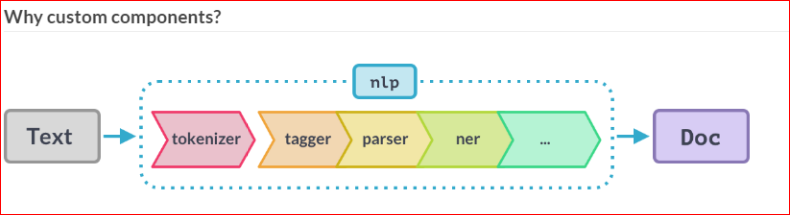

1. Make a function execute automatically when you call nlp
2. Add your own metadata to documents and tokens
3. Updating build-in attributes like doc.ents

#### Anatomy of a component(1)

Fundamentally, a pipeline component is a function or callable that takes a doc, modifies it and returns it, so it can be processed by the next component in the pipeline.

Components can be added to the pipeline using the nlp dot add pipe method. The method takes at least one argument: the component function.

1. Function that takes a doc, modifies it and returns it
2. Can be added using the nlp.add_pipe method

In [5]:
def custom_component(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe(custom_component)

#### Anatomy of a component(2)

To specify where to add the component in the pipeline, you can use the following keyword arguments:

Setting last to True will add the component last in the pipeline. This is the default behavior.

Setting first to True will add the component first in the pipeline, right after the tokenizer.

The "before" and "after" arguments let you define the name of an existing component to add the new component before or after. For example, before equals "ner" will add it before the named entity recognizer.

The other component to add the new component before or after needs to exist, though – otherwise, spaCy will raise an error.

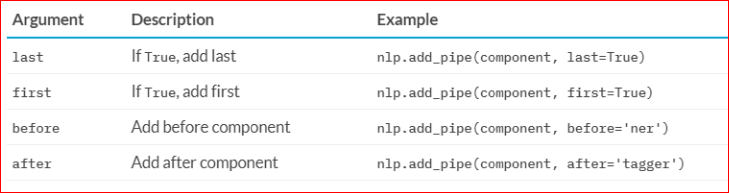

#### Example: A simple component(1)

Here's an example of a simple pipeline component.

We start off with the small English model.

We then define the component – a function that takes a Doc object and returns it.

Let's do something simple and print the length of the Doc that passes through the pipeline.

Don't forget to return the Doc so it can be processed by the next component in the pipeline! The Doc created by the tokenizer is passed through all components, so it's important that they all return the modified doc.

We can now add the component to the pipeline. Let's add it to the very beginning right after the tokenizer by setting first equals True.

When we print the pipeline component names, the custom component now shows up at the start. This means it will be applied first when we process a Doc.

In [6]:
# Create the nlp object
nlp = spacy.load('en_core_web_lg')


# Define a custom component
def custom_component(doc):
    #Print the doc's length
    print('Doc Length : ', len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe(custom_component, first=True)

# Print the pipeline component names
print('Pipeline: ', nlp.pipe_names)

Pipeline:  ['custom_component', 'tagger', 'parser', 'ner']


#### Example: A simple component(2)

Now when we process a text using the nlp object, the custom component will be applied to the Doc and the length of the document will be printed.

In [10]:
# Create the nlp object
nlp = spacy.load('en_core_web_lg')

# Define the custom component
def custom_component(doc):
    # Print the doc's length
    print('Doc length: ', len(doc))
    
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe(custom_component, first=True)

# Process a text

doc = nlp("Hello World!")

Doc length:  3


In [11]:
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
animal_patterns

Doc length:  2
Doc length:  1
Doc length:  1
Doc length:  2


[Golden Retriever, cat, turtle, Rattus norvegicus]

### Extension Attributes

### Setting custom attributes

Custom attributes let you add any meta data to Docs, Tokens and Spans. The data can be added once, or it can be computed dynamically.

Custom attributes are available via the dot-underscore property. This makes it clear that they were added by the user, and not built into spaCy, like token dot text.

Attributes need to be registered on the global Doc, Token and Span classes you can import from spacy dot tokens. You've already worked with those in the previous chapters. To register a custom attribute on the Doc, Token or Span, you can use the set extension method.

The first argument is the attribute name. Keyword arguments let you define how the value should be computed. In this case, it has a default value and can be overwritten.

1. Add custom metadata to documents, tokens and spans
2. Accessible via the ._property
3. Registered on the global Doc, Token or Span using the set_extension method

In [21]:
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension('title', default=None, force=True)
Token.set_extension('is_color', default=False, force=True)
Span.set_extension('has_color', default=False, force=True)

doc._.title = "My Document"
token._.is_color = True
span._.has_color = False

#### Extension Attribute types

There are three types of extensions: attribute extensions, property extensions and method extensions.
    
1. Attribute Extensions
2. Property Extensions
3. Method Extensions

#### Attribute Extensions

Attribute extensions set a default value that can be overwritten.

For example, a custom "is color" attribute on the token that defaults to False.

On individual tokens, its value can be changed by overwriting it – in this case, True for the token "blue".

1. Set a default value that can be overwritten

In [23]:
from spacy.tokens import Token

# Set extensions on the Token with default value
Token.set_extension("is_color", default=False, force=True)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

Doc length:  5


#### Property Extensions(1)

Property extensions work like properties in Python: they can define a getter function and an optional setter.

The getter function is only called when you retrieve the attribute. This lets you compute the value dynamically, and even take other custom attributes into account.

Getter functions take one argument: the object, in this case, the token. In this example, the function returns whether the token text is in our list of colors.

We can then provide the function via the getter keyword argument when we register the extension.

The token "blue" now returns True for "is color"

1. Define a greater and an optional setter function
2. Getter only called when you retrieve the attribute value

In [25]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ['red','yellow','blue']
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension('is_color', getter = get_is_color, force=True)

doc = nlp("The sky is blue")
print(doc[3]._.is_color, '-', doc[3].text)

Doc length:  4
True - blue


#### Property extensions(2)

If you want to set extension attributes on a Span, you almost always want to use a property extension with a getter. Otherwise, you'd have to update every possible span ever by hand to set all the values.

In this example, the "get has color" function takes the span and returns whether the text of any of the tokens is in the list of colors.

After we've processed the doc, we can check different slices of the doc and the custom "has color" property returns whether the span contains a color token or not.

1. Span extensions should almost always use a getter

In [27]:
from spacy.tokens import Span

# Define getter function
def get_has_color(span):
    colors = ['red','yellow','blue']
    return any(token.text in colors for token in span)

# Set extension on the Span with getter

Span.set_extension('has_color', getter = get_has_color, force=True)

doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, '-', doc[1:4].text)
print(doc[0:2]._.has_color, '-', doc[0:2].text)

Doc length:  5
True - sky is blue
False - The sky


#### Meethod Extensions

Method extensions make the extension attribute a callable method.

You can then pass one or more arguments to it, and compute attribute values dynamically – for example, based on a certain argument or setting.

In this example, the method function checks whether the doc contains a token with a given text. The first argument of the method is always the object itself – in this case, the Doc. It's passed in automatically when the method is called. All other function arguments will be arguments on the method extension. In this case, "token text".

Here, the custom "has token" method returns True for the word "blue" and False for the word "cloud".

1. Assign a function becomes available as an object method
2. Lets you pass arguments to the extension function

In [29]:
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension('has_token', method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token('blue'), '-blue')
print(doc._.has_token('cloud'), '-cloud')

Doc length:  5
True -blue
False -cloud


In [31]:
from spacy.lang.en import English
from spacy.tokens import Token
nlp = English()

Token.set_extension('is_country', default=False)

doc = nlp("I live in Spain.")
doc[3]._.is_country = True

print([(token._.is_country, token.text) for token in doc])

[(False, 'I'), (False, 'live'), (False, 'in'), (True, 'Spain'), (False, '.')]


In [38]:
from spacy.lang.en import English
from spacy.tokens import Token

nlp = English()

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]


# Register the Token property extension 'reversed' with the getter get_reversed
Token.set_extension('reversed', getter=get_reversed, force=True)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print("reversed:", token._.reversed)

reversed: llA
reversed: snoitazilareneg
reversed: era
reversed: eslaf
reversed: ,
reversed: gnidulcni
reversed: siht
reversed: eno
reversed: .


In [33]:
doc = nlp("All generalizations are false, including this one.")

In [34]:
for token in doc:
    print(token.text[::-1])

llA
snoitazilareneg
era
eslaf
,
gnidulcni
siht
eno
.


In [46]:
from spacy.lang.en import English
from spacy.tokens import Doc

nlp = English()

# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any([token.text for token in doc])


# Register the Doc property extension 'has_number' with the getter get_has_number
Doc.set_extension('has_number', getter=get_has_number, force=True)

# Process the text and check the custom has_number attribute
doc = nlp("The museum closed for five years in 2012.")
print("has_number:", doc._.has_number)

has_number: True


### Scaling and Performance

#### Processing large volume text

If you need to process a lot of texts and create a lot of Doc objects in a row, the nlp dot pipe method can speed this up significantly.

It processes the texts as a stream and yields Doc objects.

It is much faster than just calling nlp on each text, because it batches up the texts.

nlp dot pipe is a generator that yields Doc objects, so in order to get a list of Docs, remember to call the list method around it.

1. Use nlp.pipe method
2. Processes texts as a stream, yields Doc objects
3. Much faster then calling nlp on each text

In [48]:
BAD:

docs = [nlp(text) for text in LOTS_OF_TEXTS]

Good:

docs= list(nlp.pipe(LOTS_OF_TEXTS))

#### Passing in context(1)

nlp dot pipe also supports passing in tuples of text / context if you set "as tuples" to True.

The method will then yield doc / context tuples.

This is useful for passing in additional metadata, like an ID associated with the text, or a page number.

1. Setting as_tuples=True on nlp.pipe lets you pass in (text, context) tuples
2. Yields (doc, context) tuples
3. Useful for associating metadata witht the doc

In [49]:
data = [
    ('This is a text', {'id': 1, 'page_number': 15}),
    ('And another text', {'id': 2, 'page_number': 16}),
]

for doc, context in nlp.pipe(data, as_tuples = True):
    print(doc.text, context['page_number'])

This is a text 15
And another text 16


#### Passing in context(2)

You can even add the context meta data to custom attributes.

In this example, we're registering two extensions, "id" and "page number", which default to None.

After processing the text and passing through the context, we can overwrite the doc extensions with our context metadata.

In [53]:
from spacy.tokens import Doc

Doc.set_extension('id', default=None, force=True)
Doc.set_extension('page_number', default=None, force=True)

data = [
    ('This is a text', {'id': 1, 'page_number': 15}),
    ('And another text', {'id': 2, 'page_number':16}),
]

for doc,context in nlp.pipe(data, as_tuples=True):
    doc._.id = context['id']
    doc._.page_number = context['page_number']

print(doc._.id, doc._.page_number)

2 16


#### Using only the tokenizer

Another common scenario: Sometimes you already have a model loaded to do other processing, but you only need the tokenizer for one particular text.

Running the whole pipeline is unnecessarily slow, because you'll be getting a bunch of predictions from the model that you don't need.

1. Don;t run the whole pipeline

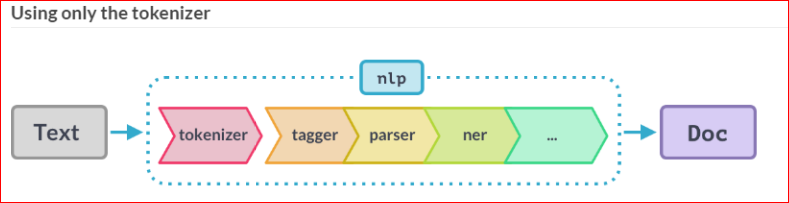

#### Using only the tokenizer(2)

If you only need a tokenized Doc object, you can use the nlp dot make doc method instead, which takes a text and returns a Doc.

This is also how spaCy does it behind the scenes: nlp dot make doc turns the text into a Doc before the pipeline components are called.

In [55]:
#1. Use nlp.make_doc to turn a text into a Doc object

#BAD:
doc = nlp("Hello world")
#GOOD:
doc = nlp.make_doc("Hello World!")

#### Disabling pipeline components

spaCy also allows you to temporarily disable pipeline components using the nlp dot disable pipes context manager.

It takes a variable number of arguments, the string names of the pipeline components to disable. For example, if you only want to use the entity recognizer to process a document, you can temporarily disable the tagger and parser.

After the with block, the disabled pipeline components are automatically restored.

In the with block, spaCy will only run the remaining components.

# Disable tagger and parser
with nlp.disable_pipes('tagger', 'parser'):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)

1. Restores them after the with block
2. Only runs the remaining components